## **Project EDA**

In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
# read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/Fall 2024/ISA 491/Final Project/data/loan_default_project.csv'
file_path = 'loan_default_project.csv'
df = pd.read_csv(file_path)
df.head()


,ID,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,address,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,last_credit_pull_d,acc_now_delinq,hardship_flag,debt_settlement_flag
0,60943837,15175.0,36 months,16.55,537.64,D,D2,Maintenance,9 years,MORTGAGE,...,"359 Miles Neck\r\nEast Fernando, ME 22690",4.0,680.0,684.0,1.0,5.0,Apr-2018,0.0,N,N
1,8955171,7500.0,36 months,11.99,249.08,B,B3,Professional,6 years,RENT,...,"630 James Corners\r\nNew Frederick, NV 93700",0.0,680.0,684.0,0.0,43.0,Oct-2016,0.0,N,N
2,10171435,12000.0,60 months,24.50,348.71,F,F3,Purchasing,4 years,MORTGAGE,...,"2082 Williams Green Apt. 298\r\nWest Ashley, W...",0.0,665.0,669.0,3.0,69.0,Feb-2017,0.0,N,N
3,8658237,10300.0,36 months,12.99,347.00,B,B4,Loan Compliance,10+ years,MORTGAGE,...,"78651 Sampson Motorway Suite 078\r\nChangfort,...",0.0,705.0,709.0,0.0,38.0,Mar-2019,0.0,N,N
4,6533627,12000.0,36 months,13.05,404.62,B,B5,Wells Fargo,2 years,RENT,...,"375 Quinn Gateway Suite 800\r\nPort Cesarview,...",1.0,665.0,669.0,0.0,20.0,May-2017,0.0,N,N


In [ ]:
## drop uninformative variables
df = df.drop(['ID', 'address', 'acc_now_delinq'], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316972 entries, 0 to 316971
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               316972 non-null  float64
 1   term                    316972 non-null  object 
 2   int_rate                316972 non-null  float64
 3   installment             316972 non-null  float64
 4   grade                   316972 non-null  object 
 5   sub_grade               316972 non-null  object 
 6   emp_title               298521 non-null  object 
 7   emp_length              302316 non-null  object 
 8   home_ownership          316972 non-null  object 
 9   annual_inc              316972 non-null  float64
 10  verification_status     316972 non-null  object 
 11  issue_d                 316972 non-null  object 
 12  loan_status             316972 non-null  object 
 13  purpose                 316972 non-null  object 
 14  title               

#### **1. Data Overview and Summary Statistics**

In [ ]:
# Display summary statistics for numerical variables
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq
count,316972.000000,316972.000000,316972.000000,3.169720e+05,316972.000000,316972.000000,316972.000000,3.169720e+05,316751.000000,316972.000000,286535.000000,316539.000000,316972.000000,316972.000000,316972.000000,316972.000000,148174.000000
mean,14112.815091,13.629120,431.848692,7.425463e+04,17.379117,11.314201,0.178255,1.581463e+04,53.737942,25.410838,1.812798,0.121495,0.282441,696.588705,700.588819,0.777633,34.711144
std,8355.416697,4.468766,250.641322,6.252554e+04,19.520992,5.142096,0.536046,2.010015e+04,24.487926,11.880897,2.146734,0.356039,0.813648,31.661489,31.662023,1.024955,21.870214
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,625.000000,629.000000,0.000000,0.000000
25%,8000.000000,10.380000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.022000e+03,35.750000,17.000000,0.000000,0.000000,0.000000,670.000000,674.000000,0.000000,16.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.900000,10.000000,0.000000,1.117500e+04,54.700000,24.000000,1.000000,0.000000,0.000000,690.000000,694.000000,0.000000,32.000000
75%,20000.000000,16.490000,567.782500,9.000000e+04,22.980000,14.000000,0.000000,1.960000e+04,72.800000,32.000000,3.000000,0.000000,0.000000,710.000000,714.000000,1.000000,51.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.298783e+06,892.300000,150.000000,32.000000,8.000000,39.000000,845.000000,850.000000,8.000000,159.000000


In [ ]:
# Generate frequency tables for categorical variables
for column in df.columns:
  if df[column].dtype == 'object':  # Check if it's a categorical variable
    print(f"\nFrequency table for '{column}':")
    print(df[column].value_counts())


Frequency table for 'term':
term
36 months    241906
60 months     75066
Name: count, dtype: int64

Frequency table for 'grade':
grade
B    92864
C    84919
A    51572
D    50691
E    25157
F     9367
G     2402
Name: count, dtype: int64

Frequency table for 'sub_grade':
sub_grade
B3    21311
B4    20515
C1    18923
C2    18127
B2    17966
B5    17633
C3    16999
C4    16235
B1    15439
A5    14973
C5    14635
D1    12751
A4    12610
D2    11136
D3     9834
D4     9300
A3     8461
A1     7821
A2     7707
D5     7670
E1     6271
E2     5974
E3     4911
E4     4346
E5     3655
F1     2815
F2     2191
F3     1821
F4     1416
F5     1124
G1      820
G2      582
G3      437
G4      302
G5      261
Name: count, dtype: int64

Frequency table for 'emp_title':
emp_title
Teacher                        3508
Manager                        3425
Registered Nurse               1473
RN                             1457
Supervisor                     1445
                               ... 
Senior Land

#### **2. Data Visualization**

In [ ]:
!pip install summarytools


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00


In [ ]:
# create histograms/barcharts for numeric/categorical variables
import summarytools
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,loan_amnt[float64],Mean (sd) : 14112.8 (8355.4)min < med < max:500.0 < 12000.0 < 40000.0IQR (CV) : 12000.0 (1.7),"1,388 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsElEQVR4nO3dTW7aQBiA4W/KjwxIthAS7LhApS5YcogetkfoghNwg+yQEDLCiYsx7qJNpCqBwPyU+az32Tvx4hXyfIwH0zSNALH78ugbAG7RffQNXGOMGYhI3/LyY9M0Lz7vB48TbajGmMFkMvmepunY5vr9fr8zxvwg1naINlQR6adpOl4uly9ZlpX3XJjnebJarcbb7bYvIoTaAjGHKiIiWZaV0+n02eLSgfebwcOwmIIKhAoVCBUqECpUCLqYcpyDpufzuefzfqBXsFBd56BVVSV1XX8ty/KniNis+tEiIT9RreegIiJPT0/j9Xo9PJ1OnRA3B12Cz1Ft56C73Y45KN6wmIIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKkT/zpStuq57IpIaY2z/BK9bR6SVoRZF0auq6tt8Pu90Op27d26J8Lp1bFoZ6vF47CZJMlwsFuVsNtvdez2vW8enlaG+Go1Gtq9ai/C6dVRYTEEFQoUKhAoVCBUqtHox5cJxDssM1jNC/YDrHJYZrH+E+gGXOSwz2DAI9QqHOSwzWM9YTEEFQoUKhAoVCBUqECpUIFSoQKhQgVChwqcDf4fjzTnaHN5cDdXleHOONodPn32iWh9vztHm8Omm7/ptjjfnaHP4xKaUANjL6h+hesZe1jAI1TP2soZBqIHY7mWt6zoVjiJ6h1AjwlFElxFqRDiK6DJCjRBHEb1HqHjj+GvgIgGfjwkVIuL+a+AiYZ+PCRWvnH4NPPTzMaHiH7a/Bv5XsOdjQm0Zh69vo96WSagt4jKHjX1bJqG2iMscNvZtmYTaQjZz2Ni3ZfLOFFQgVKhAqFCBUKECoUKFm1b9eZ4n9/7hw+GQiIgURZFsNpvh/7xe6//Wet8ifxqp67or9pu+fzVNc3H2+xsDlp0aWh+8DgAAAABJRU5ErkJggg=="">",0(0.0%)
2,term[object],1. 36 months2. 60 months,"241,906 (76.3%)75,066 (23.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABPUlEQVR4nO3bQWrDMBRF0a9iQjORMAYvxovoYrsI7cYYa5CETNRBJ6HDWjx9nHtW8CE3gRi/UGs1QCGY2dXMLr0PQXPPWuu99xGvhmmavmKMY+9D0FYpZQshfHsKbogxjsuy3FNKj97HoI193z9zzuO6rhcz8xObmVlK6THP8633MWjq2vuAvz56H4D3QWyQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhlig8xg9vuyXe9D0I7Xz3MopWw559EcvmyH/yulbGb27H3HKwYv5+Vu8BKY8kHF6y+bu28ljnM55fM4Q8Nx7qZ8XmdoOM7rlI9/xifEQ13IEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIONuyufpFrTlcsrncYaG4xi8QOYHCltq3yMaNyQAAAAASUVORK5CYII="">",0(0.0%)
3,int_rate[float64],Mean (sd) : 13.6 (4.5)min < med < max:5.3 < 13.3 < 31.0IQR (CV) : 6.1 (3.0),563 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACmklEQVR4nO3cQW7aQBSA4TclIAOqLYQEOy4QqQuWHKKH7ba7LjgBN2CDkJAxwo2DMe4q2TWBGbueN/2//ZCR8sth5DcxdV0L4LsvXW8AuMdT1xv4iDFmKCIDy+WXuq5fmtwPuuNtqMaY4XQ6/R7H8cRm/el0So0xP4g1DN6GKiKDOI4nq9XqJUmS4pGFWZZF6/V6cjgcBiJCqAHwOVQREUmSpJjNZr8tlg4b3ww6w2EKKnj/RLVVVVVfRGJjjO1HcBjzSJCh5nneL8vy22Kx6PV6vYe+377hMOaXIEO9XC5PURSNlstlMZ/P00fXcxjzT5ChvhmPx7YHMREOY17hMAUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVAj6Xb8LxzFBRgQb1mqojpfz4tvt1m9yP/dyHRNkRLB5rYXqejmvLMuoqqrnoih+iYjtBJQVlzFBRgTb0eYT1fpynojIdrudbDab0fV67bWxuXs4jAkyItiw1r+j2l7OS9OUXzbeceqHCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKjw6fSUw/BzZ4PPXeN2QPM+DNVl+LnLwecucTugHZ89Ua2Hn30YfO4CtwPacdfgtM3w8/8++MztgGZxmIIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqMC/RveM49C1SKCD14TqEdeha5FwB68J1SMuQ9ciYQ9eE6qHHIauRQIdvOYwBRV4ogYm1BuwhBqQkG/AEmpAQr4BS6gBCvEGLIcpqECoUIE//Xjn8+vbu0LNsix69IPP53MkIpLnebTf70f/cr3Wn93lvne73VfX17fH4/FsjPkpIjbrX+u6/uu6P8yihCjUJjZpAAAAAElFTkSuQmCC"">",0(0.0%)
4,installment[float64],Mean (sd) : 431.8 (250.6)min < med < max:16.1 < 375.4 < 1533.8IQR (CV) : 317.5 (1.7),"51,087 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACnUlEQVR4nO3dvY7aQBRA4TthIQYiG0QCHS1FpBSUPEQeNo8QJFoa3oAOySAjHLwYcKqtwv4wY+/Odc7X27g462U8jMcURSGA7z599AUAb/FQ5cmNMW0RaTmc4lQUxbGs64FelYVqjGkPBoOfYRj2bc+x3+93xphfxIoq76itMAz7s9nsGEVRdu/BSZIEi8WiH8dxS0QI9T9X6b9+EZEoirLhcPjH8vB2qRcDtRhMQYXK76guLpdLU0RCY4zN4QzEasTbUNM0beZ5/mM8Hjcajcbd33EZiNWLt6GeTqeHIAg60+k

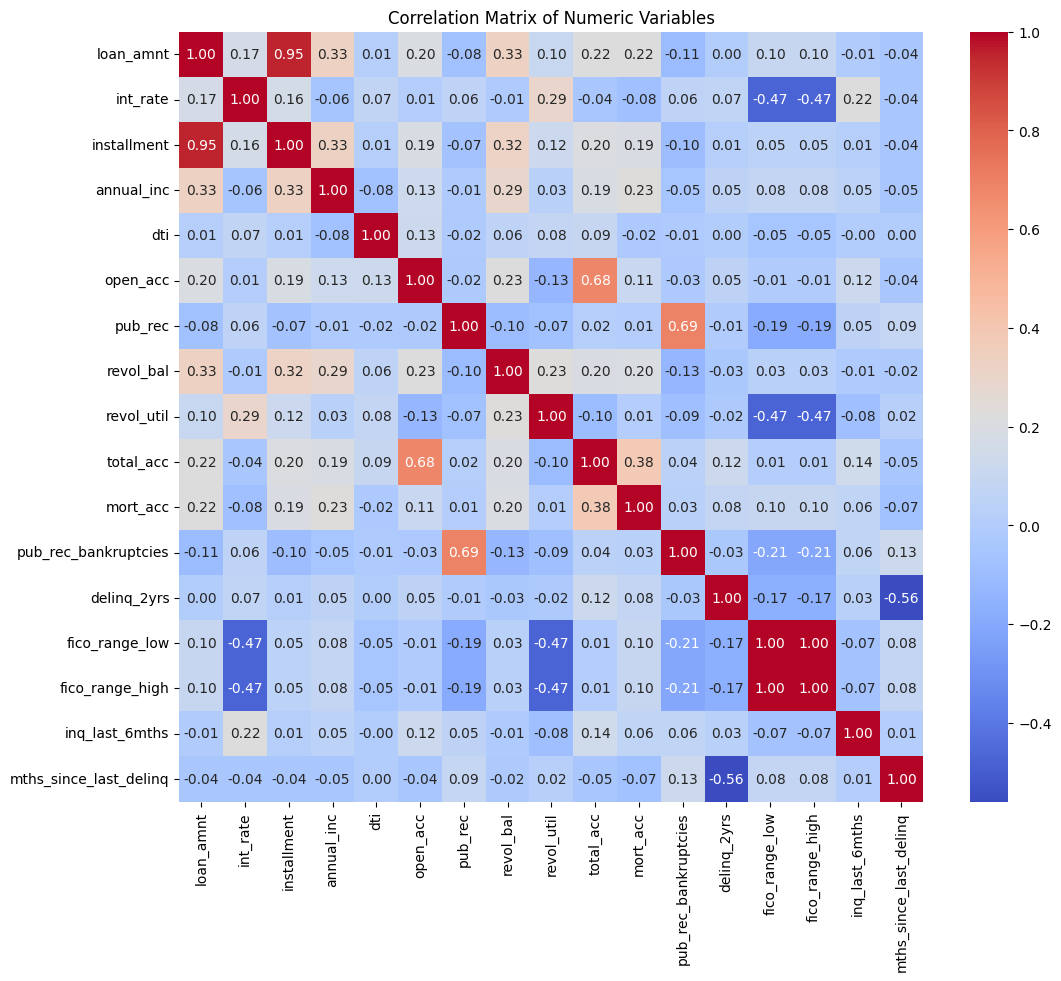

In [ ]:
# Correlation matrix for numeric variables
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [ ]:
df[['fico_range_high','fico_range_low']].head()

,fico_range_high,fico_range_low
0,684.0,680.0
1,684.0,680.0
2,669.0,665.0
3,709.0,705.0
4,669.0,665.0


In [ ]:
# drop fico_range_low, given range between high and low is always 4, we only need one fico_range variable
df = df.drop(['fico_range_low'], axis=1)

In [ ]:
# drop installment because highly corr with loan amt
df = df.drop(['installment'], axis=1)

#### **3. Handling Missing Data**

In [ ]:
# missing values
missing_values = df.isnull().sum()
missing_values

,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_title,18451
emp_length,14656
home_ownership,0
annual_inc,0
verification_status,0


In [ ]:
# Calculate the percentage of missing values for each variable
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Filter out variables with no missing values
variables_with_missing_values = missing_percentage[missing_percentage > 0]

# Display the variables and their missing value percentages
variables_with_missing_values

,0
emp_title,5.821019
emp_length,4.623752
title,0.451459
revol_util,0.069722
mort_acc,9.602425
pub_rec_bankruptcies,0.136605
mths_since_last_delinq,53.253284
last_credit_pull_d,0.005994


In [ ]:
## drop all variables with % missing > 50
df = df.drop(["mths_since_last_delinq"], axis = 1)

In [ ]:
# make emp_title a missing indicator
df['emp_title_missing_indicator'] = df['emp_title'].isnull().astype(int)
## drop emp_title
df.drop('emp_title', axis=1, inplace=True)

## encode emp_length, title with unknown
df['emp_length'] = df['emp_length'].fillna('Unknown')
df['title'] = df['title'].fillna('Unknown')

In [ ]:
## impute log_mort_acc with median
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].median())

## impute revol_util with meidan
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

## impute pub_rec_bankruptcies with 0
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

In [ ]:
## make bankruptcy flag: 1 = at least 1 pub_rec_bankruptcy, 0 = no pub_rec_bankruptcy
df['bankruptcy_flag'] = np.where(df['pub_rec_bankruptcies'] > 0, 1, 0)

## drop pub_rec_bankruptcies
df.drop('pub_rec_bankruptcies', axis=1, inplace=True)

In [ ]:
## make delinq_2yrs: 1 = at least 1 pub_rec_bankruptcy, 0 = no pub_rec_bankruptcy
df['delinq_2yrs_flag'] = np.where(df['delinq_2yrs'] > 0, 1, 0)

## drop delinq_2yrs
df.drop('delinq_2yrs', axis=1, inplace=True)

In [ ]:
## drop pub_rec because highly correlated with pub_rec_bankruptcy
df.drop('pub_rec', axis=1, inplace=True)

In [ ]:
## impute last_credit_pull_d with median and format as number to make comparisons
cols = ['issue_d','earliest_cr_line','last_credit_pull_d']

for col in cols:
  df[col] = pd.to_datetime(df[col], format='%b-%Y')
  df[col] = df[col].fillna(df[col].median())
  df[col] = pd.to_numeric(df[col])

In [ ]:
# Verify that there are no more missing values
missing_values_after_imputation = df.isnull().sum()
print("\nMissing values after imputation:")
missing_values_after_imputation


Missing values after imputation:


,0
loan_amnt,0
term,0
int_rate,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


#### **4. Outlier/Anomaly Detection**

In [ ]:
df.select_dtypes(include='number').skew()

,0
loan_amnt,0.776411
int_rate,0.420171
annual_inc,41.661069
issue_d,-0.831922
dti,421.817672
earliest_cr_line,-1.083741
open_acc,1.214544
revol_bal,9.634864
revol_util,-0.044694
total_acc,0.865028


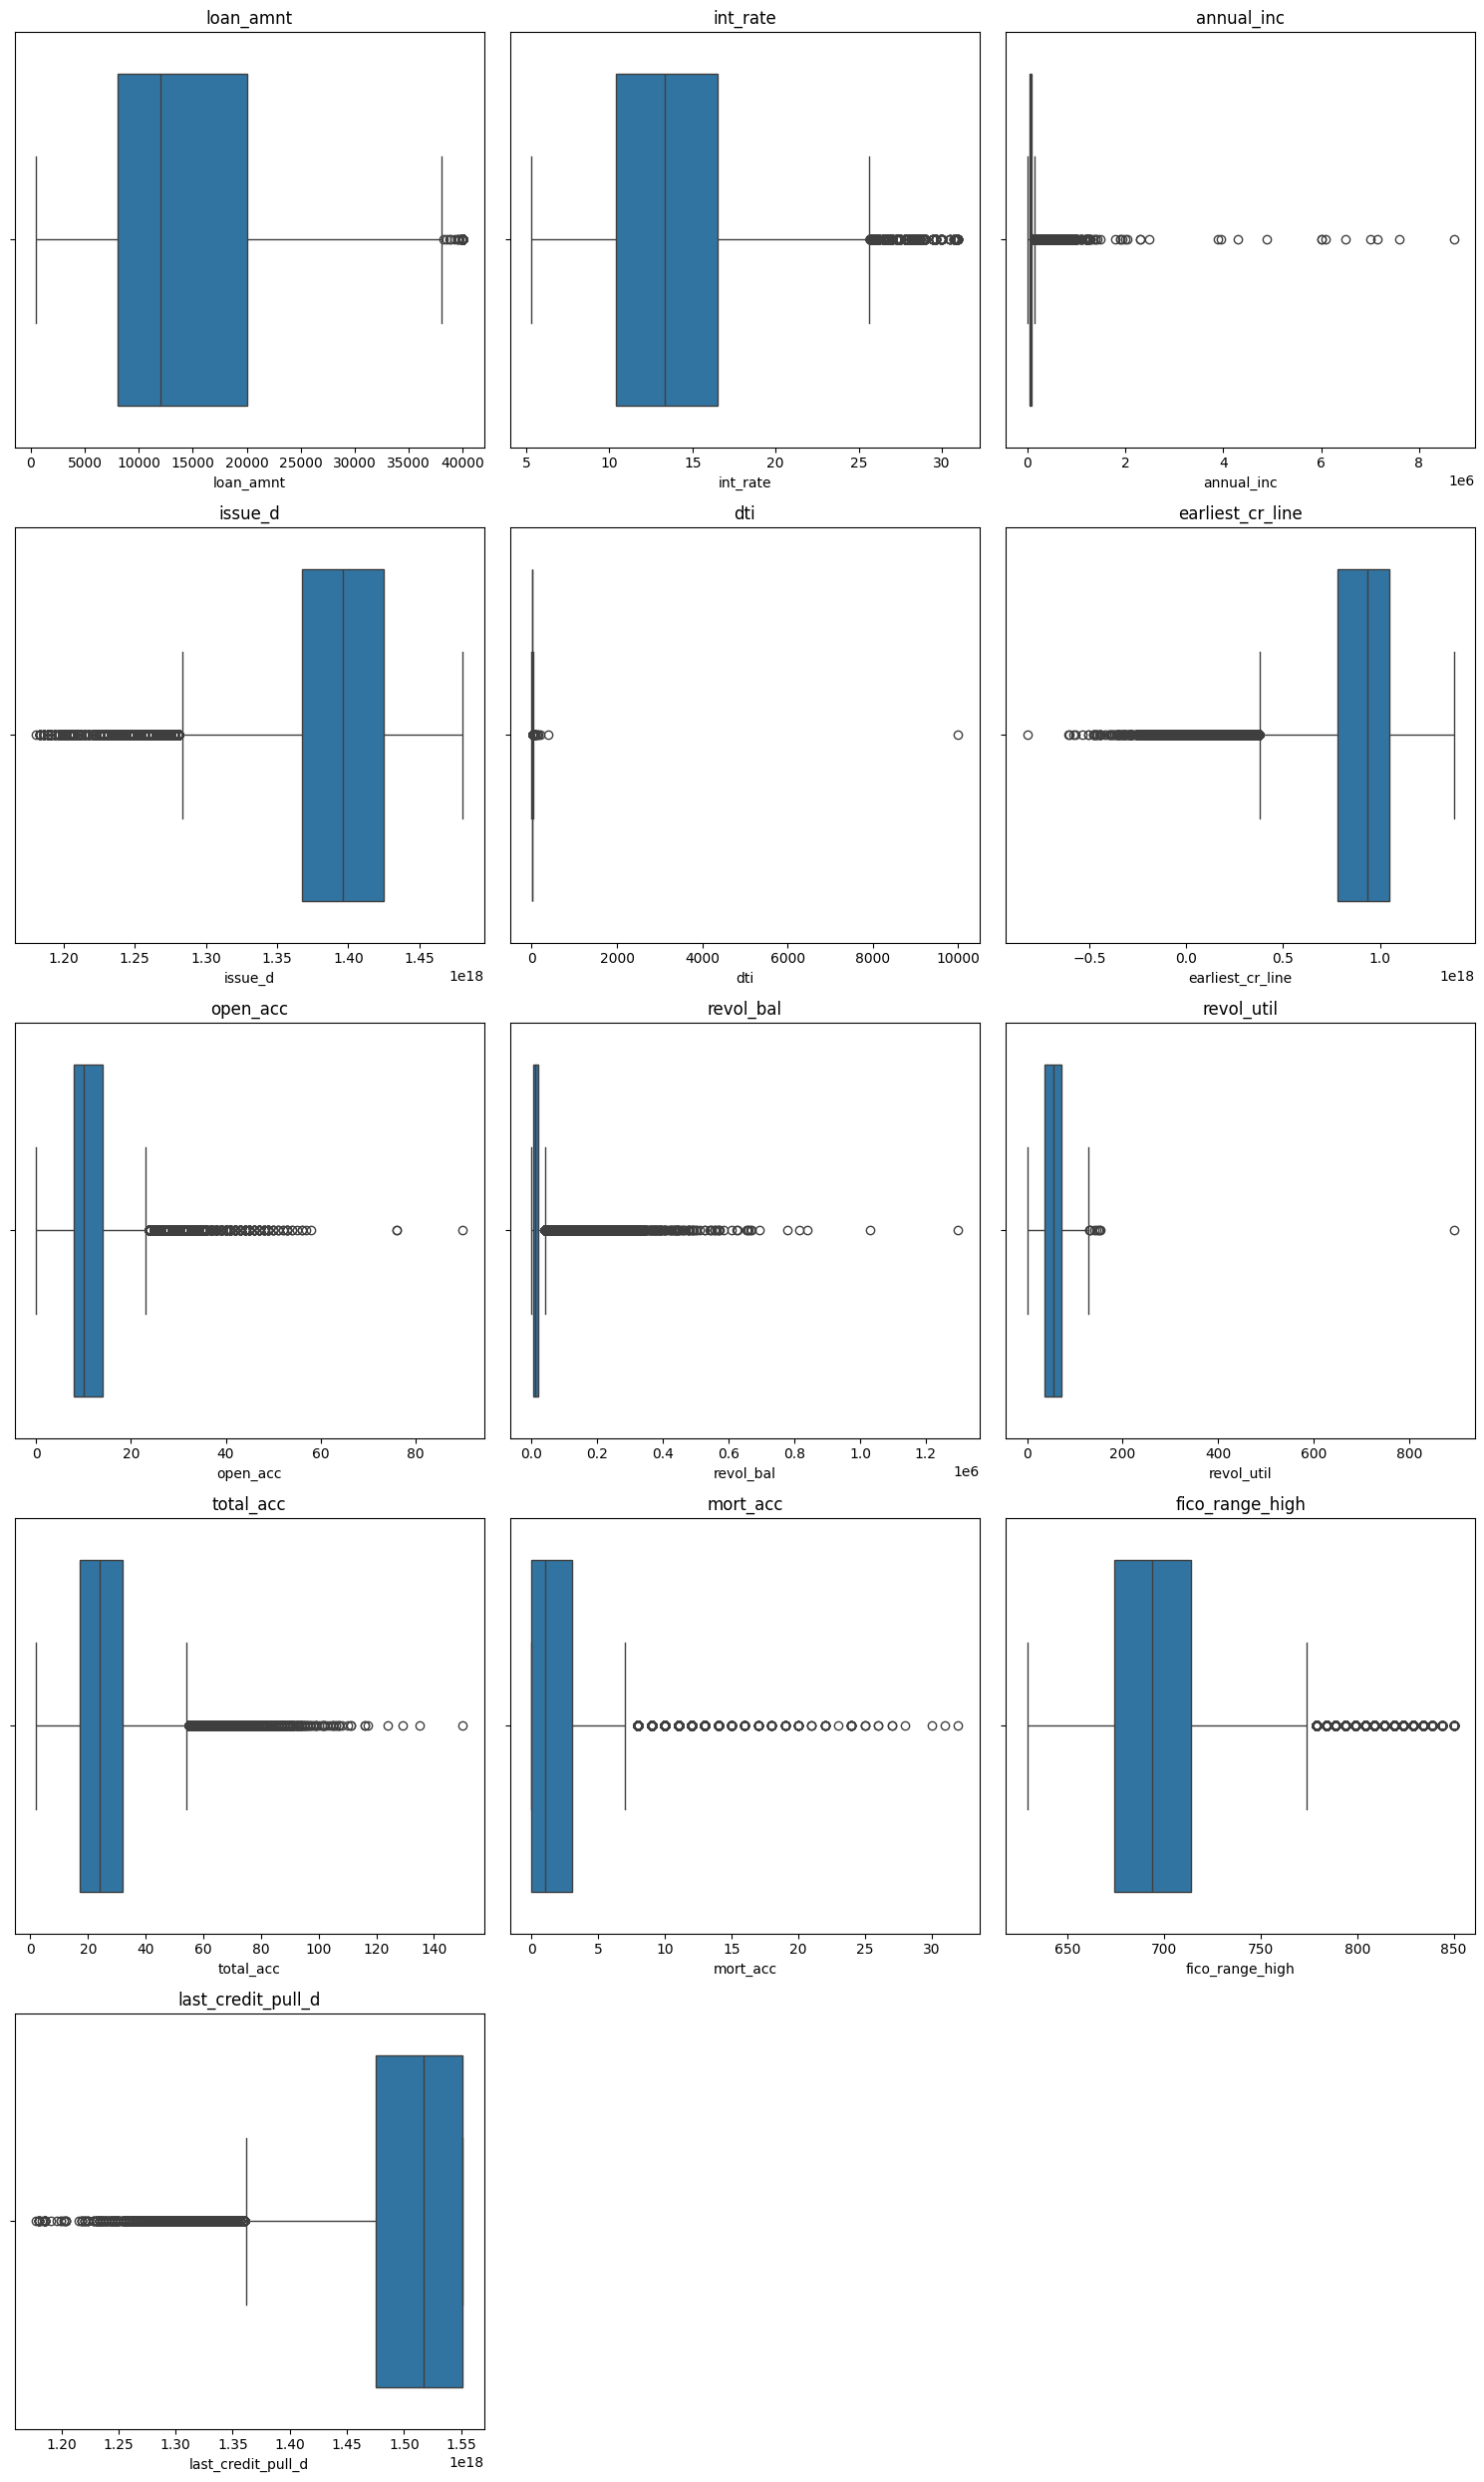

In [ ]:
# Assuming 'numeric_df' contains your numerical variables
numeric_df = df.select_dtypes(include=np.number)

# Find columns with absolute values greater than 10
cols_to_plot = [col for col in numeric_df.columns if (numeric_df[col].abs() > 10).any()]

# Create boxplots in a row with 3 plots per row
num_plots = len(cols_to_plot)
num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(cols_to_plot):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
## sort by descending to find the index for outliers for columns below
cols = ['dti', 'open_acc', 'revol_util', 'revol_bal']

for i in cols:
  print(f'Column: {i}')
  print("-"*20)
  print(df[i].sort_values(ascending=False).head())
  print(df[i].sort_values(ascending=False).tail())
  print("-"*20)

Column: dti
--------------------
129477    9999.00
234208     380.53
167483     189.90
171431     145.65
127283     138.03
Name: dti, dtype: float64
63134     0.0
277616    0.0
137049    0.0
208860    0.0
297475    0.0
Name: dti, dtype: float64
--------------------
Column: open_acc
--------------------
150476    90.0
135637    76.0
131851    76.0
45494     58.0
52257     57.0
Name: open_acc, dtype: float64
90093     0.0
134995    0.0
223458    0.0
37127     0.0
278885    0.0
Name: open_acc, dtype: float64
--------------------
Column: revol_util
--------------------
100231    892.3
95770     153.0
218182    150.7
122532    148.0
89136     145.8
Name: revol_util, dtype: float64
75599     0.0
88291     0.0
145164    0.0
132295    0.0
85544     0.0
Name: revol_util, dtype: float64
--------------------
Column: revol_bal
--------------------
230052    1298783.0
189134    1030826.0
113595     838698.0
111368     814300.0
309600     778614.0
Name: revol_bal, dtype: float64
124298    0.0
145164

In [ ]:
# Removing outliers
rows_to_drop = [129477, 150476, 135637, 131851, 100231]
df = df.drop(rows_to_drop)

In [ ]:
df.select_dtypes(include='number').skew()

,0
loan_amnt,0.776429
int_rate,0.420173
annual_inc,41.661285
issue_d,-0.831905
dti,0.594986
earliest_cr_line,-1.083754
open_acc,1.194180
revol_bal,9.635817
revol_util,-0.172138
total_acc,0.863332


#### **5. Data Transformation**

In [ ]:
# Identify numeric variables with a skew above 1.5 in absolute value excluding 'emp_title_missing_indicator' and 'bankruptcy_flag and '
numeric_skew = df.select_dtypes(include='number').skew()
variables_to_transform = numeric_skew[numeric_skew.abs() > 1.5].index.tolist()
variables_to_transform.remove('emp_title_missing_indicator')
variables_to_transform.remove('bankruptcy_flag')
variables_to_transform.remove('delinq_2yrs_flag')

# Apply log transformation to these variables
for variable in variables_to_transform:
  df[f"log_{variable}"] = np.log1p(df[variable])  # Use log1p to handle zero and negative values
  df.drop(variable, axis=1, inplace=True)


In [ ]:
df.select_dtypes(include='number').skew()

,0
loan_amnt,0.776429
int_rate,0.420173
issue_d,-0.831905
dti,0.594986
earliest_cr_line,-1.083754
open_acc,1.194180
revol_util,-0.172138
total_acc,0.863332
fico_range_high,1.261210
last_credit_pull_d,-1.228254


#### **6. Encoding Categorical Variables/8. Dimensionality Reduction/9. Feature Creation**

In [ ]:
# check levels
df.select_dtypes(include='object').nunique()

,0
term,2
grade,7
sub_grade,35
emp_length,12
home_ownership,6
verification_status,3
loan_status,2
purpose,14
title,40407
initial_list_status,2


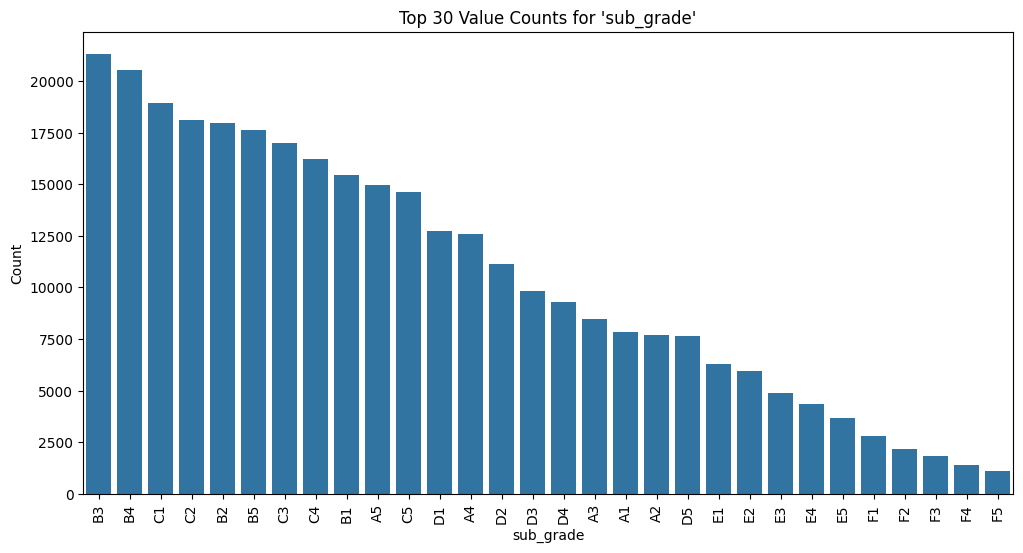

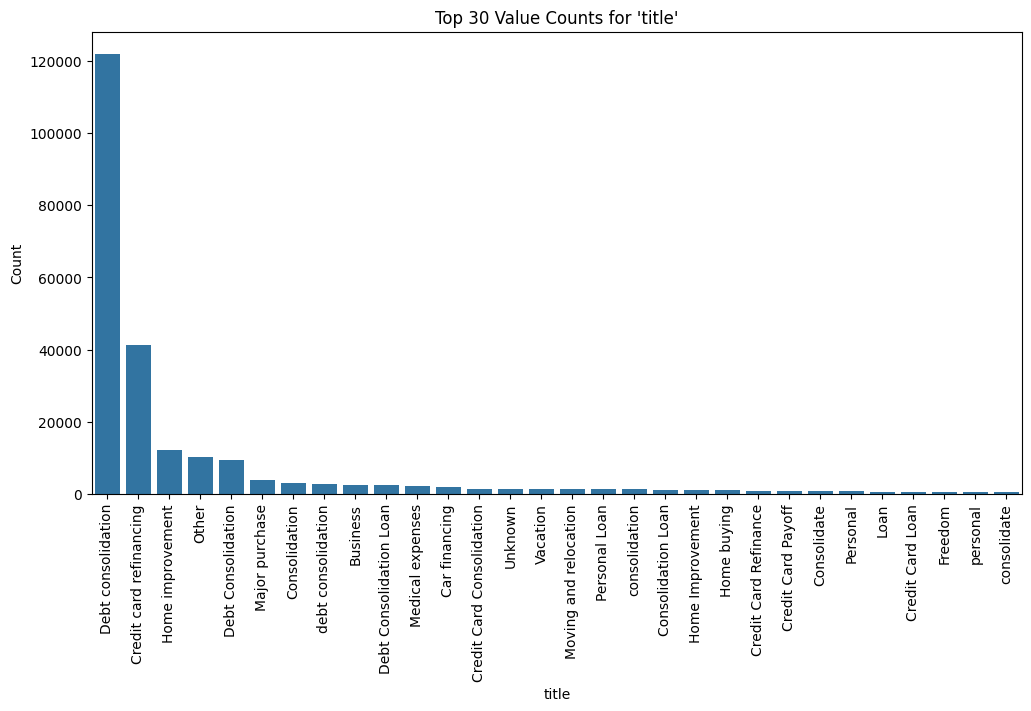

In [ ]:
# prompt: plot top 30 value counts of all categorical variable greater than 30
for column in df.columns:
    if df[column].dtype == 'object':
        if len(df[column].unique()) > 30:
            value_counts = df[column].value_counts()
            top_30_value_counts = value_counts[:30]

            plt.figure(figsize=(12, 6))
            sns.barplot(x=top_30_value_counts.index, y=top_30_value_counts.values)
            plt.title(f"Top 30 Value Counts for '{column}'")
            plt.xlabel(column)
            plt.ylabel("Count")
            plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
            plt.show()


<ipython-input-36-e47ebdf0f175>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title'].fillna('Unknown', inplace=True)


<Axes: xlabel='title'>

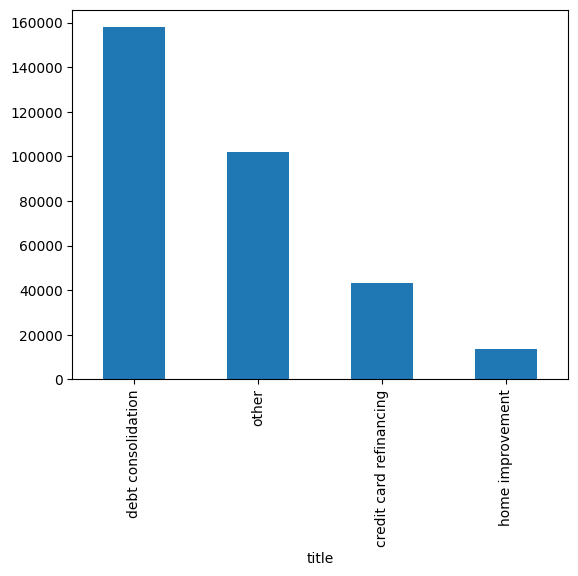

In [ ]:
### DIMENSION REDUCTION ###
# fill na with unknown for title and then convert all obs that contain consolidat to debt consolidation
df['title'].fillna('Unknown', inplace=True)

## convert all titles to lowercase
df['title'] = df['title'].str.lower()

## convert all titles that contain consolidat to debt consolidation using contain
df['title'] = np.where(df['title'].str.contains('consolidat'), 'debt consolidation', df['title'])

## convert titles that are credit card refinance to credit card refinancing
df['title'] = np.where(df['title'].str.contains('credit card refinance'), 'credit card refinancing', df['title'])

## convert titles that arent in the top 3 to other
df['title'] = np.where(~df['title'].isin(['debt consolidation', 'credit card refinancing', 'home improvement']), 'other', df['title'])

## plot bar chart of title
df['title'].value_counts()[df['title'].value_counts() > 1000].plot(kind='bar')

In [ ]:
# Drop sub_grade becasue grade contains relavent info
df = df.drop(['sub_grade'], axis=1)

In [ ]:
## check all levels
df.select_dtypes(include='object').nunique()

,0
term,2
grade,7
emp_length,12
home_ownership,6
verification_status,3
loan_status,2
purpose,14
title,4
initial_list_status,2
application_type,3


In [ ]:
## show levels of purpose
print(df['purpose'].value_counts())
print(df['title'].value_counts())

## DROP TITLE AND KEEP PURPOSE (purpose better categorizes title (less levels))
df = df.drop(['title'], axis=1)

purpose
debt_consolidation    187809
credit_card            66422
home_improvement       19210
other                  16860
major_purchase          7021
small_business          4574
car                     3792
medical                 3362
moving                  2272
vacation                1944
house                   1779
wedding                 1451
renewable_energy         257
educational              214
Name: count, dtype: int64
title
debt consolidation         157898
other                      102090
credit card refinancing     43294
home improvement            13685
Name: count, dtype: int64


In [ ]:
## convert car, medical, moving, vaction, house, wedding, education to personal for df['purpose']
df['purpose'] = np.where(df['purpose'].isin(['car', 'medical', 'moving', 'vacation', 'house', 'wedding', 'educational']), 'personal', df['purpose'])
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,187809
credit_card,66422
home_improvement,19210
other,16860
personal,14814
major_purchase,7021
small_business,4574
renewable_energy,257


In [ ]:
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,...,last_credit_pull_d,hardship_flag,debt_settlement_flag,emp_title_missing_indicator,bankruptcy_flag,delinq_2yrs_flag,log_annual_inc,log_revol_bal,log_mort_acc,log_inq_last_6mths
0,15175.0,36 months,16.55,D,9 years,MORTGAGE,Source Verified,1443657600000000000,Fully Paid,debt_consolidation,...,1522540800000000000,N,N,0,0,1,10.404293,9.339349,1.098612,0.693147
1,7500.0,36 months,11.99,B,6 years,RENT,Not Verified,1385856000000000000,Charged Off,credit_card,...,1475280000000000000,N,N,0,0,0,10.596660,8.869820,0.000000,0.000000
2,12000.0,60 months,24.50,F,4 years,MORTGAGE,Source Verified,1388534400000000000,Charged Off,debt_consolidation,...,1485907200000000000,N,N,0,0,0,11.156265,9.367344,1.945910,1.386294
3,10300.0,36 months,12.99,B,10+ years,MORTGAGE,Verified,1383264000000000000,Charged Off,debt_consolidation,...,1551398400000000000,N,N,0,0,0,10.463132,7.553811,1.791759,0.000000
4,12000.0,36 months,13.05,B,2 years,RENT,Verified,1375315200000000000,Fully Paid,debt_consolidation,...,1493596800000000000,N,N,0,0,1,11.350418,9.958638,1.098612,0.000000


In [ ]:
# check levels
df.select_dtypes(include='object').nunique()

,0
term,2
grade,7
emp_length,12
home_ownership,6
verification_status,3
loan_status,2
purpose,8
initial_list_status,2
application_type,3
hardship_flag,1


In [ ]:
#drop 'initial_list_status', 'application_type', 'debt_settlement_flag', 'hardship_flag'
## high/low levels, and not relavent.
df = df.drop(['initial_list_status', 'application_type', 'debt_settlement_flag', 'hardship_flag'], axis=1)

In [ ]:
# check levels
df.select_dtypes(include='object').nunique()

,0
term,2
grade,7
emp_length,12
home_ownership,6
verification_status,3
loan_status,2
purpose,8


In [ ]:
# convert loan_status to 1 = Charged Off, 0 = Fully Paid
df['loan_status'] = np.where(df['loan_status'] == 'Charged Off', 1, 0)
df = pd.get_dummies(df, drop_first=True)

In [ ]:
## convert loan_status back Charged Off = 1, Fully Paid = 0
# df['loan_status'] = np.where(df['loan_status'] == 1, 'Charged Off', 'Fully Paid')

In [ ]:
df.head()

,loan_amnt,int_rate,issue_d,loan_status,dti,earliest_cr_line,open_acc,revol_util,total_acc,fico_range_high,...,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,purpose_personal,purpose_renewable_energy,purpose_small_business
0,15175.0,16.55,1443657600000000000,0,23.56,1157068800000000000,11.0,46.1,24.0,684.0,...,False,True,False,True,False,False,False,False,False,False
1,7500.0,11.99,1385856000000000000,1,29.49,1030838400000000000,11.0,56.5,23.0,684.0,...,True,False,False,False,False,False,False,False,False,False
2,12000.0,24.50,1388534400000000000,1,18.50,854755200000000000,12.0,83.6,48.0,669.0,...,False,True,False,True,False,False,False,False,False,False
3,10300.0,12.99,1383264000000000000,1,11.15,838857600000000000,11.0,23.8,37.0,709.0,...,False,False,True,True,False,False,False,False,False,False
4,12000.0,13.05,1375315200000000000,0,33.36,767750400000000000,21.0,58.7,35.0,669.0,...,True,False,True,True,False,False,False,False,False,False


In [ ]:
## leaving dates as numbers because we think the time when
## you have your earliest credit line would be helpful in predicting loan_status

In [ ]:
## Final cleaning steps
## make all the column names/headers in df clean
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '')

## map 0 & 1 to bool variables
for col in df.columns:
  if df[col].dtype == 'bool':
    df[col] = df[col].astype(int)

df.head()

,loan_amnt,int_rate,issue_d,loan_status,dti,earliest_cr_line,open_acc,revol_util,total_acc,fico_range_high,...,home_ownership_rent,verification_status_source_verified,verification_status_verified,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,purpose_personal,purpose_renewable_energy,purpose_small_business
0,15175.0,16.55,1443657600000000000,0,23.56,1157068800000000000,11.0,46.1,24.0,684.0,...,0,1,0,1,0,0,0,0,0,0
1,7500.0,11.99,1385856000000000000,1,29.49,1030838400000000000,11.0,56.5,23.0,684.0,...,1,0,0,0,0,0,0,0,0,0
2,12000.0,24.50,1388534400000000000,1,18.50,854755200000000000,12.0,83.6,48.0,669.0,...,0,1,0,1,0,0,0,0,0,0
3,10300.0,12.99,1383264000000000000,1,11.15,838857600000000000,11.0,23.8,37.0,709.0,...,0,0,1,1,0,0,0,0,0,0
4,12000.0,13.05,1375315200000000000,0,33.36,767750400000000000,21.0,58.7,35.0,669.0,...,1,0,1,1,0,0,0,0,0,0


#### **7. Class Imbalance Analysis/10. Splitting the Data into Training and Test Sets/11.Addressing Class Imbalance with Oversampling**

In [ ]:
# create training set 70, 30 with random_state = 19

from sklearn.model_selection import train_test_split
X = df.drop('loan_status', axis=1)
y = df['loan_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

In [ ]:
#check imbalnce
y_train.value_counts()

,count
loan_status,
0,178321
1,43555


In [ ]:
## Undersampling
from imblearn.under_sampling import RandomUnderSampler

##instance
rus = RandomUnderSampler(random_state=19)

##fit
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
## check imbalance
y_train_rus.value_counts()

,count
loan_status,
0,43555
1,43555


#### **Deliverable**

In [ ]:
df_sample = df.sample(1000)
df_sample.to_csv('group_4.csv', index = False)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 255898 to 14814
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            1000 non-null   float64
 1   int_rate                             1000 non-null   float64
 2   issue_d                              1000 non-null   int64  
 3   loan_status                          1000 non-null   int64  
 4   dti                                  1000 non-null   float64
 5   earliest_cr_line                     1000 non-null   int64  
 6   open_acc                             1000 non-null   float64
 7   revol_util                           1000 non-null   float64
 8   total_acc                            1000 non-null   float64
 9   fico_range_high                      1000 non-null   float64
 10  last_credit_pull_d                   1000 non-null   int64  
 11  emp_title_missing_indicator  

In [ ]:
# sample of X-train and X_train_rus (undersampling)
X_train_sample = X_train.sample(1000)
X_train_O_sample = X_train_rus.sample(1000)

print("Sample of X_train:")
print(X_train_sample)
print("\nSample of Undersampled X_train (X_train_O):")
X_train_O_sample

Sample of X_train:
        loan_amnt  int_rate              issue_d    dti     earliest_cr_line  \
212324    10000.0     13.98  1412121600000000000  11.34  1062374400000000000   
123066    35000.0     20.49  1367366400000000000  25.59  1059696000000000000   
200055    15000.0     11.99  1388534400000000000  11.79   988675200000000000   
233027     5000.0     15.61  1385856000000000000  13.34   901929600000000000   
160269    22000.0      7.62  1359676800000000000  22.51   546825600000000000   
...           ...       ...                  ...    ...                  ...   
231824    11000.0     13.33  1438387200000000000  21.64    94694400000000000   
19742     15000.0     15.95  1293840000000000000   6.17  1093996800000000000   
314749     3000.0      9.25  1380585600000000000  19.63   973036800000000000   
219366     8500.0     13.47  1241136000000000000  14.86   549504000000000000   
95765     14000.0     13.33  1433116800000000000  12.32  1022889600000000000   

        open_acc  re

,loan_amnt,int_rate,issue_d,dti,earliest_cr_line,open_acc,revol_util,total_acc,fico_range_high,last_credit_pull_d,...,home_ownership_rent,verification_status_source_verified,verification_status_verified,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,purpose_personal,purpose_renewable_energy,purpose_small_business
172082,12500.0,12.49,1401580800000000000,26.21,949363200000000000,9.0,93.2,19.0,704.0,1477958400000000000,...,0,0,0,0,1,0,0,0,0,0
236279,15800.0,25.80,1396310400000000000,19.46,604713600000000000,15.0,97.1,25.0,689.0,1485907200000000000,...,0,1,0,1,0,0,0,0,0,0
200680,22700.0,7.90,1385856000000000000,19.55,986083200000000000,9.0,78.8,31.0,734.0,1483228800000000000,...,0,0,1,0,0,0,0,0,0,0
244726,15000.0,12.99,1396310400000000000,19.62,1075593600000000000,16.0,22.9,43.0,729.0,1475280000000000000,...,1,1,0,1,0,0,0,0,0,0
281268,2975.0,24.50,1398902400000000000,20.94,1164931200000000000,6.0,0.0,15.0,694.0,1533081600000000000,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308176,12000.0,12.12,1359676800000000000,19.58,244512000000000000,6.0,57.0,19.0,684.0,1551398400000000000,...,0,0,0,0,0,0,0,0,0,0
172715,8000.0,10.99,1404172800000000000,12.33,899251200000000000,11.0,29.0,17.0,704.0,1441065600000000000,...,0,0,0,0,0,0,0,1,0,0
272296,16000.0,6.62,1391212800000000000,23.80,541555200000000000,10.0,54.8,23.0,734.0,1475280000000000000,...,1,0,0,0,0,0,0,0,0,0
254392,5350.0,7.89,1427846400000000000,14.72,849398400000000000,14.0,23.7,38.0,704.0,1541030400000000000,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Full Balanced Training Data .csv
# Recombine X and y for download
X_train_rus['loan_status'] = y_train_rus
X_train_rus.to_csv('group_4_balanced_training.csv', index = False)

# Full Testing Data .csv
X_test['loan_status'] = y_test
X_test.to_csv('group_4_test.csv', index = False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316967 entries, 0 to 316971
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            316967 non-null  float64
 1   int_rate                             316967 non-null  float64
 2   issue_d                              316967 non-null  int64  
 3   loan_status                          316967 non-null  int64  
 4   dti                                  316967 non-null  float64
 5   earliest_cr_line                     316967 non-null  int64  
 6   open_acc                             316967 non-null  float64
 7   revol_util                           316967 non-null  float64
 8   total_acc                            316967 non-null  float64
 9   fico_range_high                      316967 non-null  float64
 10  last_credit_pull_d                   316967 non-null  int64  
 11  emp_title_missing_